In [72]:
import pandas as pd

# Load the DEGs data
deg_107490 = pd.read_csv('/content/top_DEGs_GSE107490.csv')
deg_61853 = pd.read_csv('/content/top_DEGs_GSE61853.csv')

# Display the first few rows to check the data
print(deg_107490.head())
print(deg_61853.head())

           logFC       AveExpr         t   P.Value  adj.P.Val         B
0 -803289.962963  7.107867e+05 -2.898639  0.025671   0.361711 -3.385187
1  773312.444444  1.536909e+06  2.520131  0.043143   0.397781 -3.651361
2  463324.222222  4.413580e+05  6.426313  0.000534   0.236063 -1.961682
3 -324697.759259  1.110866e+05 -2.570867  0.040206   0.390347 -3.614367
4  172459.851852  2.998257e+05  2.560947  0.040763   0.392276 -3.621570
      Row.names         logFC       AveExpr         t   P.Value  adj.P.Val  \
0  ILMN_1655595 -16619.230816  44137.228724 -2.886189  0.013894   0.638656   
1  ILMN_1687384  15387.660102   7435.021236  3.894239  0.002202   0.629622   
2  ILMN_3249748 -13903.222721  26408.066888 -3.612420  0.003663   0.629622   
3  ILMN_1699829 -12470.115622  23885.259510 -2.365408  0.036044   0.690823   
4  ILMN_1813704 -12158.069533  10899.952835 -2.249249  0.044430   0.693010   

          B    SYMBOL  
0 -4.339963  SERPINE2  
1 -4.222131      IFI6  
2 -4.251877      LDHA  
3 -

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


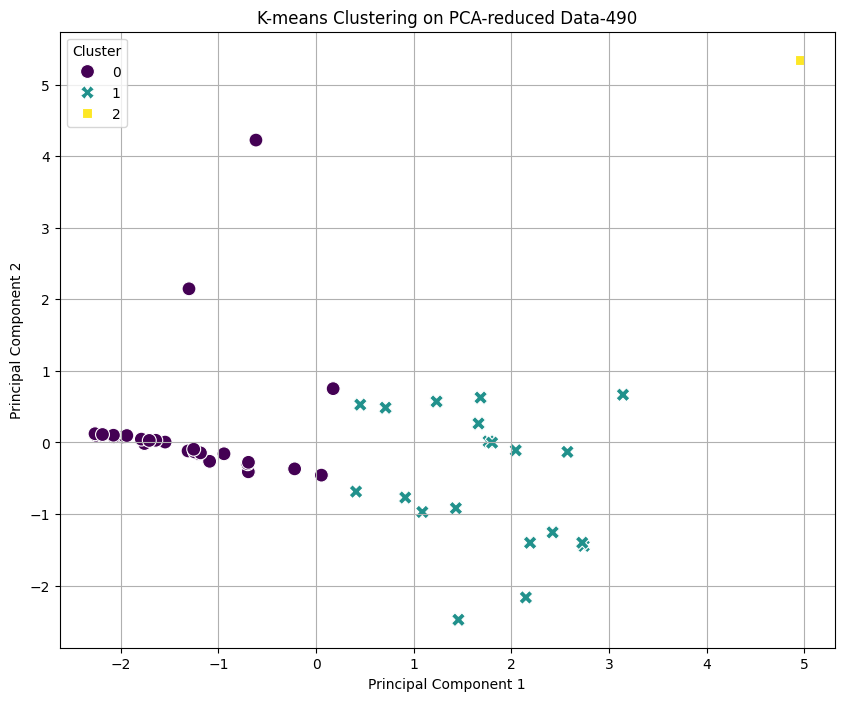

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import numpy as np

# Load data
path = '/top50_DEGs_GSE107490.csv'
data = pd.read_csv(path)

# Select features for clustering (excluding non-feature columns if present)
X = data.select_dtypes(include=[float, int]).values

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction for better visualization and to aid clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as necessary
clusters = kmeans.fit_predict(X_pca)

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', style=clusters, s=100)
plt.title('K-means Clustering on PCA-reduced Data-490')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


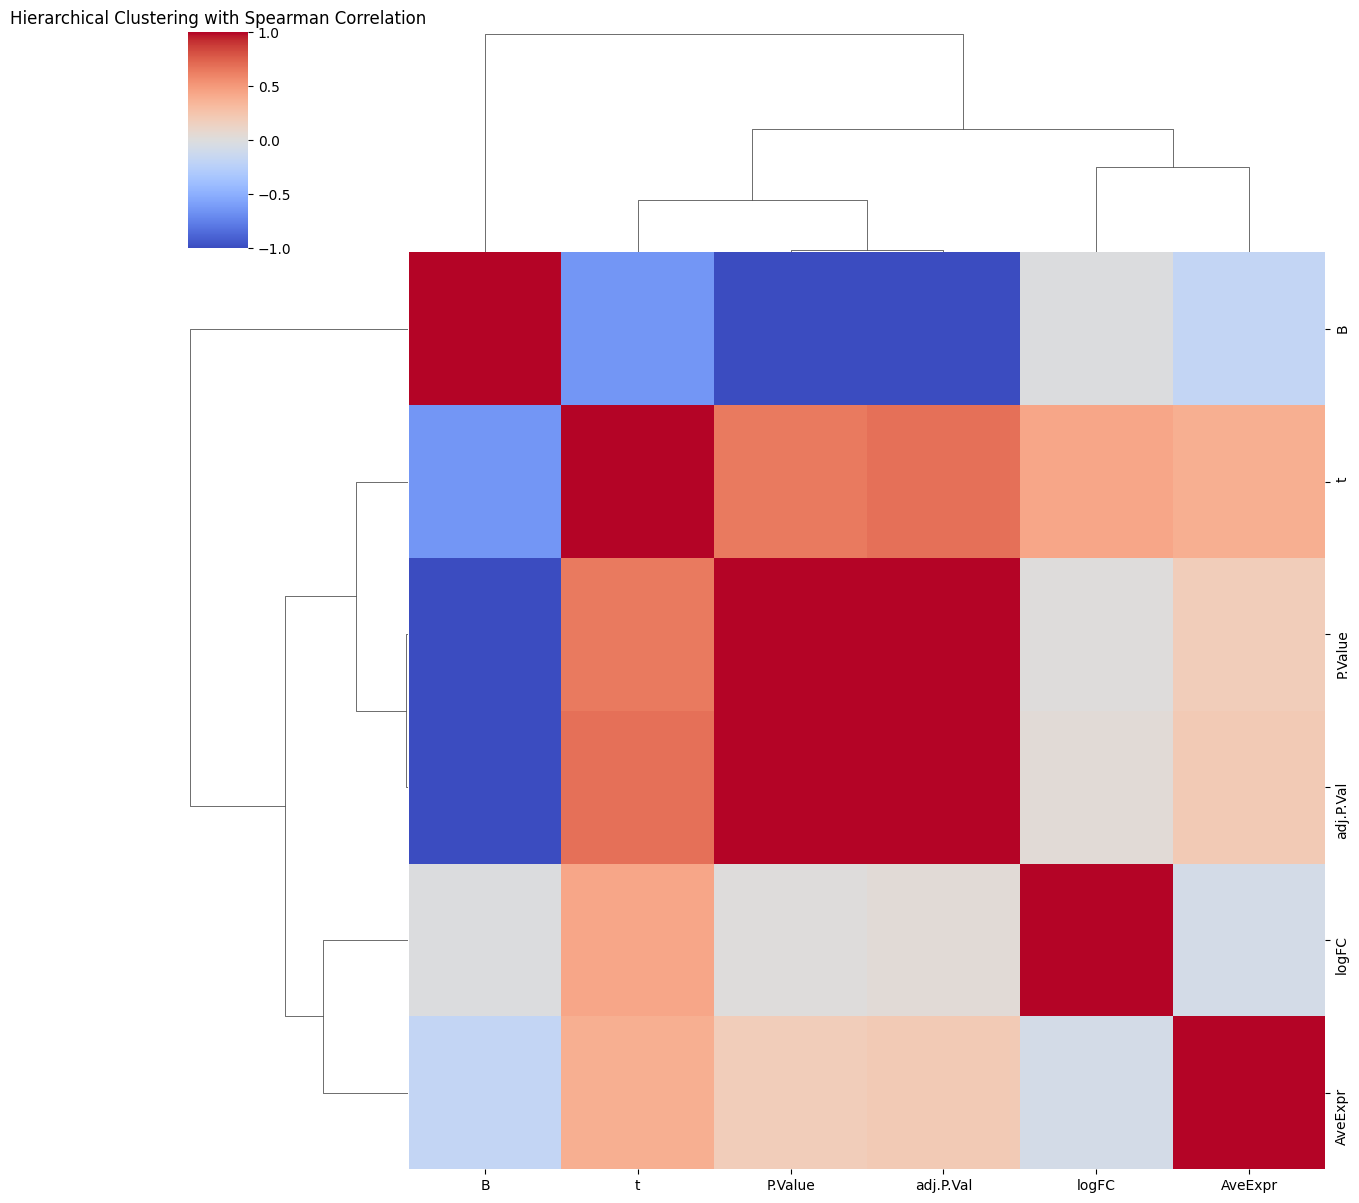

In [73]:
# Create a heatmap with the dendrogram using hierarchical clustering

# Select features for clustering (excluding non-feature columns if present)
X = data.select_dtypes(include=[float, int]).values

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Make sure feature_names matches the actual features used in the correlation matrix
feature_names = data.select_dtypes(include=[np.number]).columns  # This should fix the index issue

# Creating a DataFrame from the Spearman correlation matrix
rho_df = pd.DataFrame(rho, index=feature_names, columns=feature_names)

# Create a clustermap with the Spearman correlation matrix
sns.clustermap(rho_df, method='ward', cmap='coolwarm', figsize=(12, 12),
               yticklabels=True, xticklabels=True)
plt.title('Hierarchical Clustering with Spearman Correlation')
plt.show()

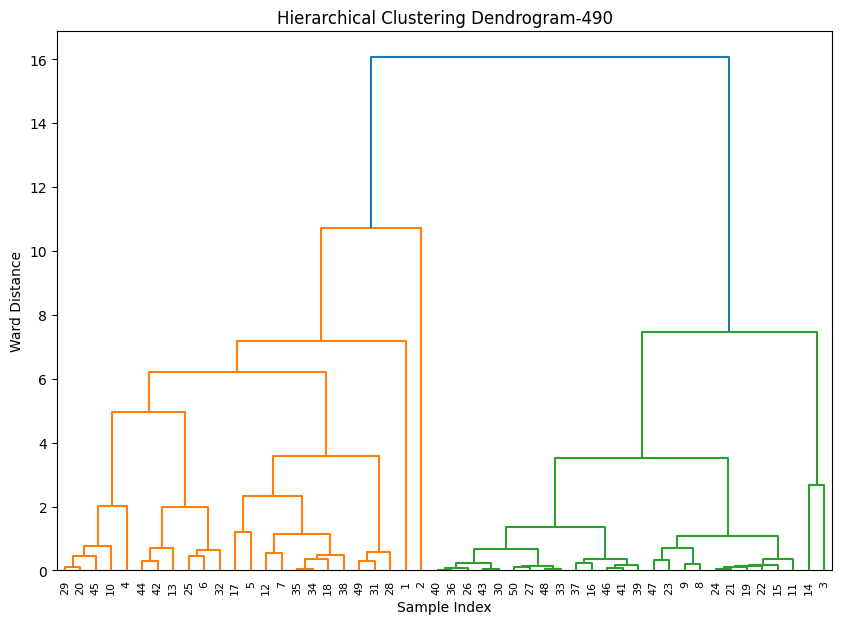

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Hierarchical clustering
linked = linkage(X_scaled, 'ward')

# Plotting dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=range(1, len(X_scaled)+1),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram-490')
plt.xlabel('Sample Index')
plt.ylabel('Ward Distance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


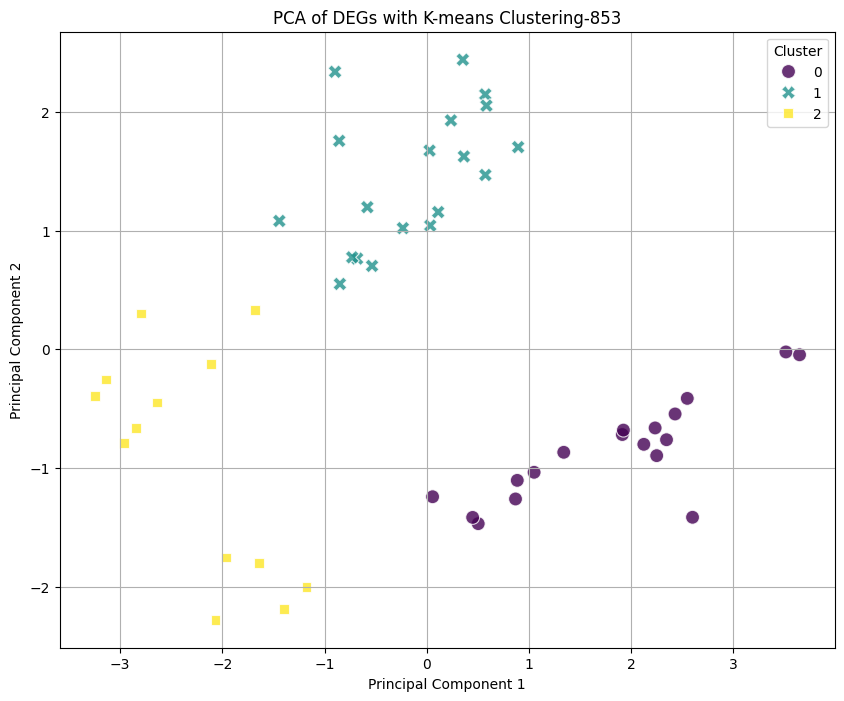

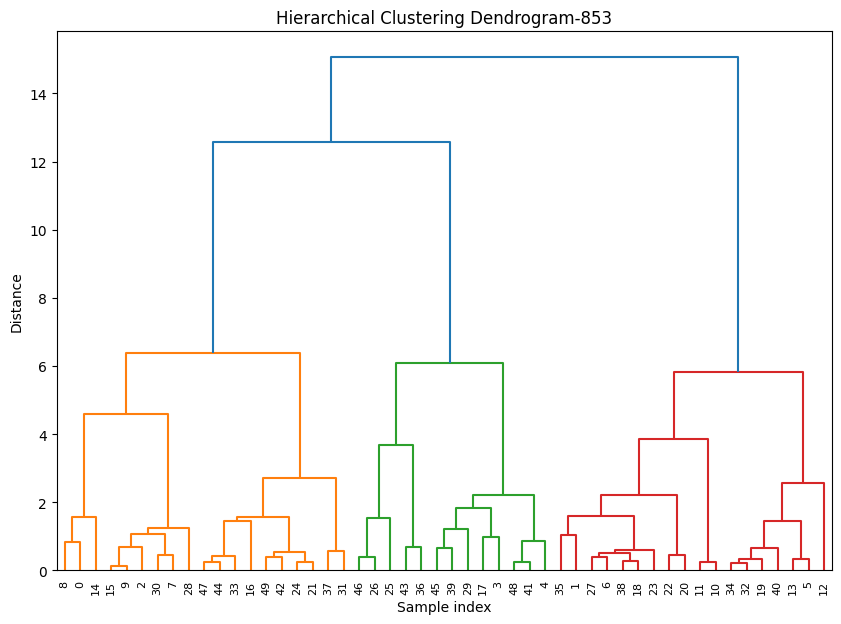

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DEGs data
deg_61853 = pd.read_csv('/top50_DEGs_GSE61853.csv')

# Assuming the first column or a specific column contains gene identifiers or non-numeric data
# Exclude this column if it is not part of the features
X = deg_61853.iloc[:, 1:-1].values  # This skips the first column and last column if it's non-numeric

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plotting the results of PCA with K-means clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, style=clusters, palette='viridis', s=100, alpha=0.8)
plt.title('PCA of DEGs with K-means Clustering-853')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram-853')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


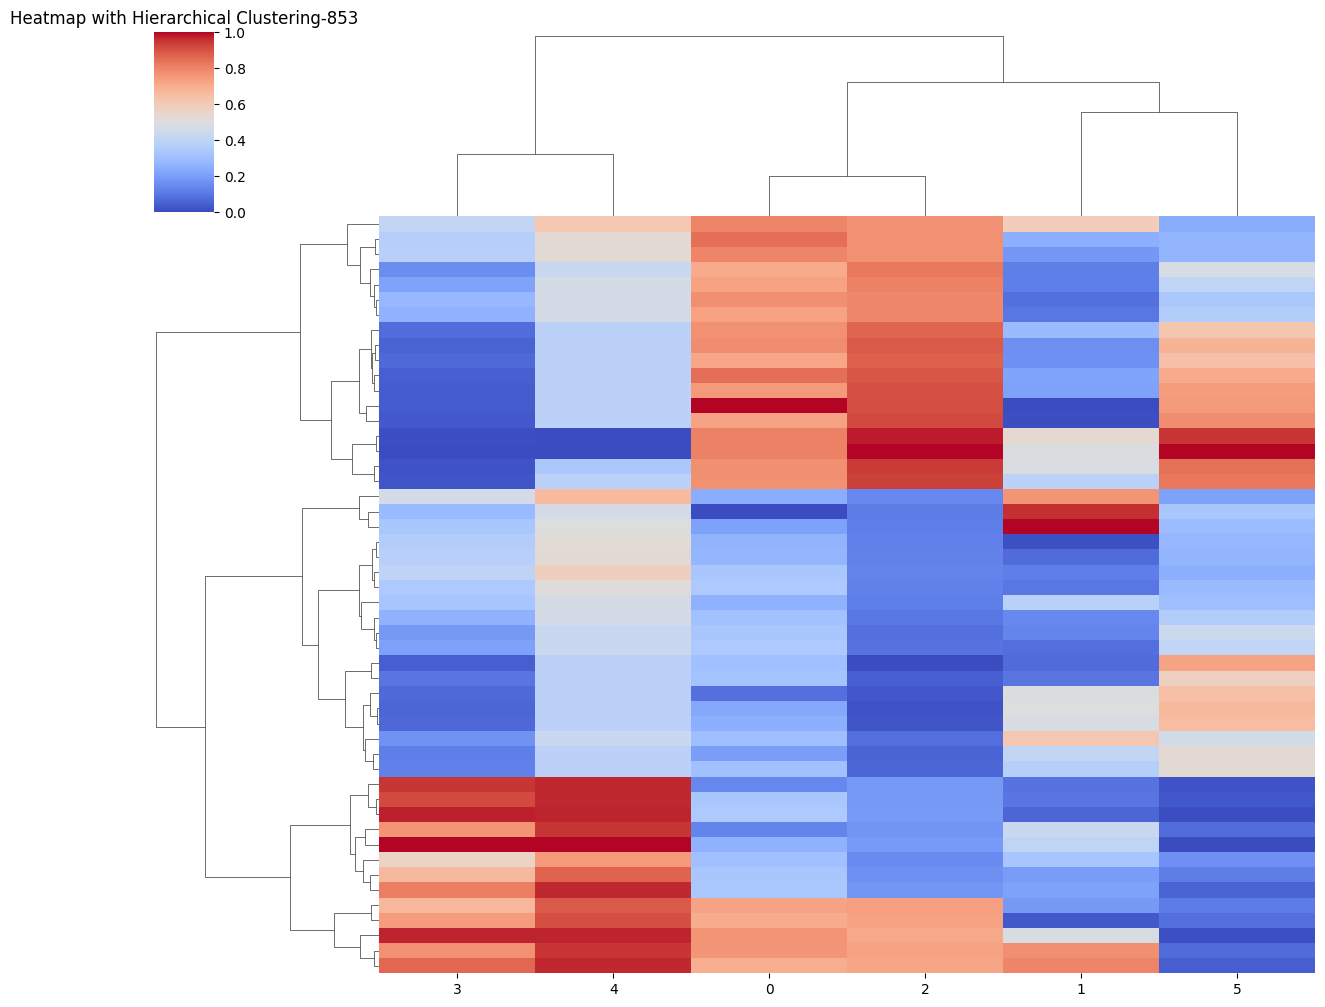

In [69]:

# Create a heatmap with the dendrogram
sns.clustermap(X_scaled, method='ward', cmap='coolwarm', standard_scale=1,
               figsize=(12, 10), yticklabels=False)
plt.title('Heatmap with Hierarchical Clustering-853')
plt.show()


In [70]:

from sklearn.ensemble import RandomForestClassifier
# Data preprocessing
# You might need to check the column names to confirm
print("Columns in GSE61853:", data_61853.columns)
print("Columns in GSE107490:", data_107490.columns)

# If 'Row.names' is not present, you can skip dropping it
# If it is present, you can drop it
if 'Row.names' in data_61853.columns:
    data_61853.drop(columns=['Row.names'], inplace=True)  # Drop unnecessary column
# Drop rows with NA values
data_61853.dropna(inplace=True)
data_107490.dropna(inplace=True)

# Handle missing values if any

# Split data into features and target
X = data_61853.drop(columns=['SYMBOL'])  # Features
y = data_61853['SYMBOL']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()  # Initialize model
model.fit(X_train, y_train)  # Train model

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Columns in GSE61853: Index(['logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B', 'SYMBOL',
       'Label'],
      dtype='object')
Columns in GSE107490: Index(['AveExpr', 't', 'P.Value', 'adj.P.Val', 'B'], dtype='object')
Accuracy: 0.0021598272138228943
